In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy import stats

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('c:\Divya\credit_risk_dataset.csv',skipinitialspace=True)

In [3]:
df.shape

(32581, 12)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
#checking duplicate
df.duplicated()
df.duplicated().value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

False    32416
True       165
dtype: int64

In [8]:
df.drop_duplicates(keep='first', inplace =True)

In [9]:
df.duplicated().value_counts()

False    32416
dtype: int64

In [10]:
df.shape

(32416, 12)

In [11]:
# checkingnull values
df.isna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isna().sum()>0] # for checking the nan value column

['person_emp_length', 'loan_int_rate']

In [14]:
a = round(df.person_emp_length.mean(),2)
b = round(df.loan_int_rate.mean(),2)
print(a,b)

4.79 11.02


In [15]:
df.person_emp_length.replace(np.nan,a, inplace = True)
df.loan_int_rate.replace(np.nan,b, inplace = True)

In [16]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [18]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [19]:
df.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.656519
loan_amnt                      1.191944
loan_int_rate                  0.217398
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

In [20]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.person_income.quantile(q = [0.25, 0.5, 0.75 ]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(IQR, UL, LL)


38542.0 55000.0 79218.0
40676.0 140232.0 -22472.0


In [21]:
df[(df.person_income > UL) | (df.person_income < LL)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,0.01,N,20
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,11.02,0,0.00,N,21
32551,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,0.01,N,19
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,N,21


In [22]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

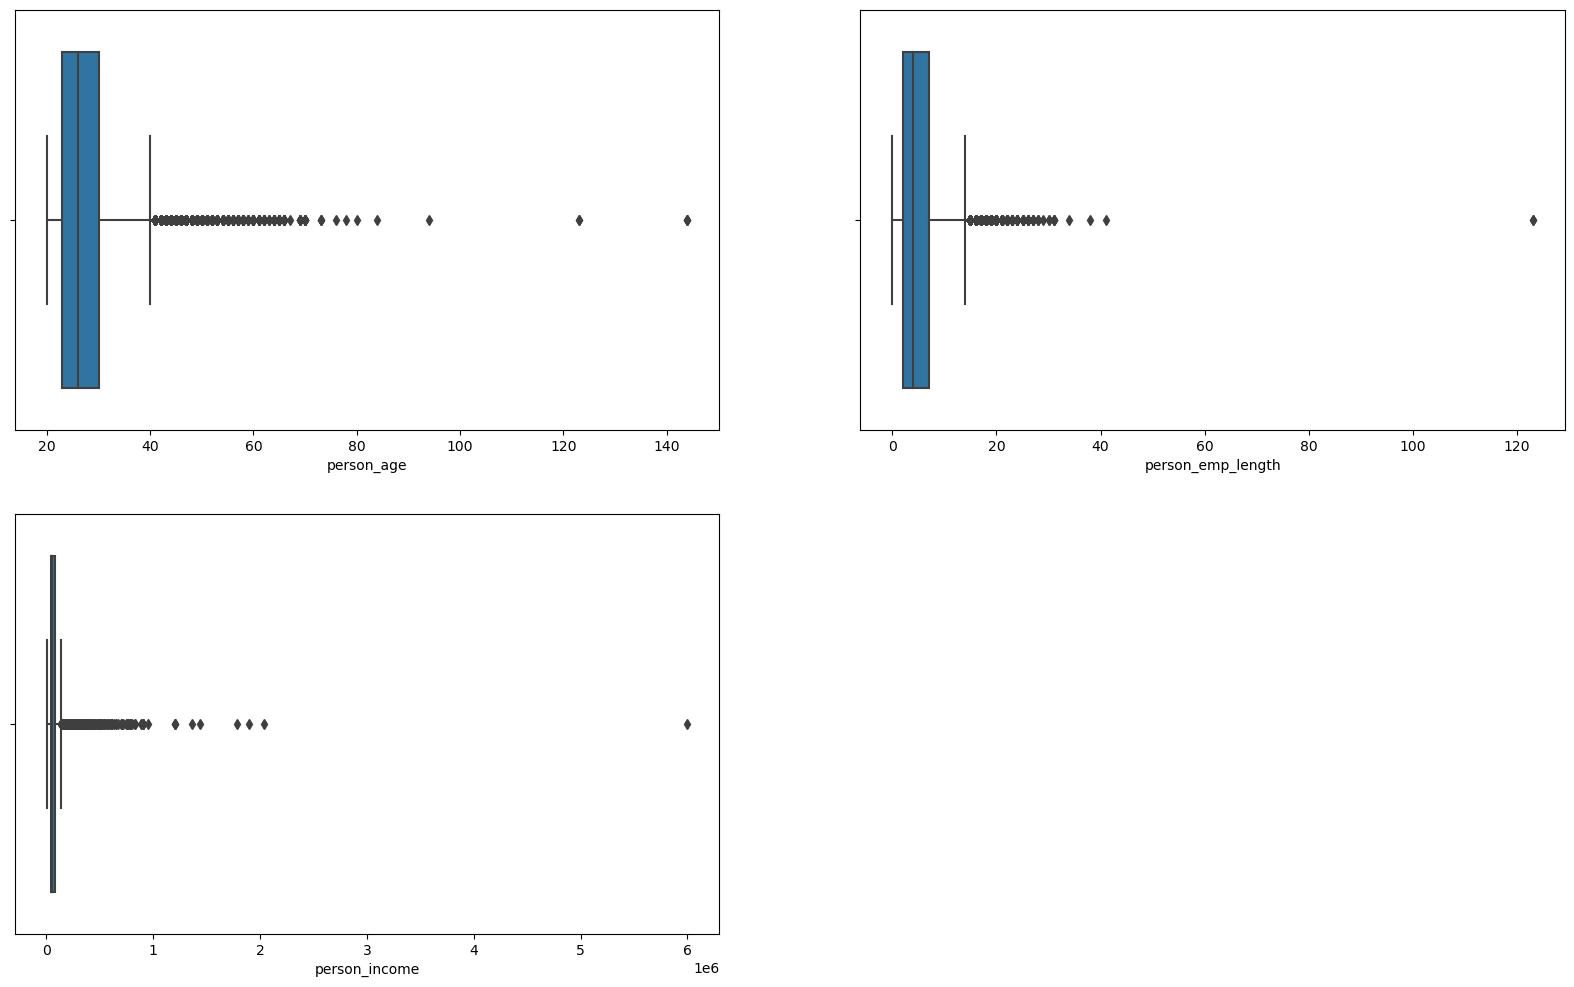

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(221)
sns.boxplot(df.person_age)

plt.subplot(222)
sns.boxplot(df.person_emp_length)


plt.subplot(223)
sns.boxplot(df.person_income);

In [24]:
# Cube Root transformation
df.person_age**(1/3)

0        2.802039
1        2.758924
2        2.924018
3        2.843867
4        2.884499
           ...   
32576    3.848501
32577    3.779763
32578    4.020726
32579    3.825862
32580    4.041240
Name: person_age, Length: 32416, dtype: float64

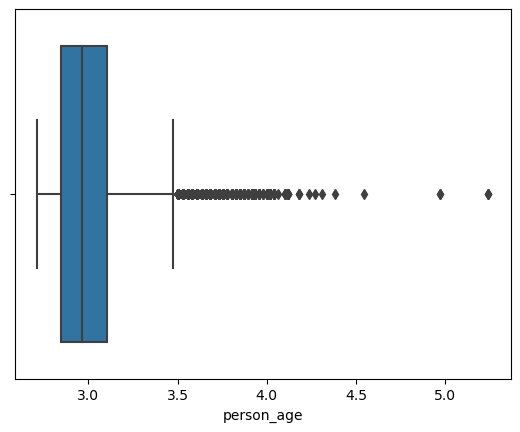

In [25]:
sns.boxplot(df.person_age**(1/3));

In [26]:
df['zscore_age']=stats.zscore(df.person_age)
df=df.loc[df['zscore_age'].abs()< 3]
df.shape

(31859, 13)

<AxesSubplot:xlabel='person_age'>

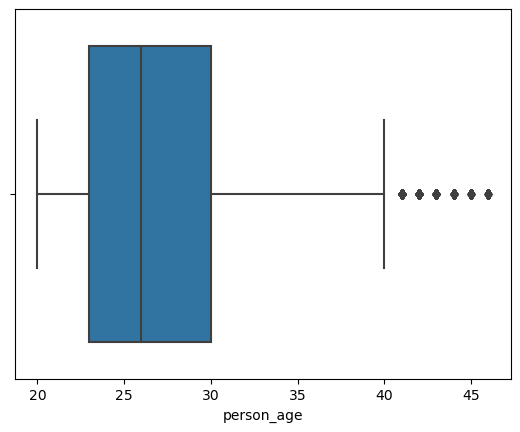

In [27]:
sns.boxplot(x = df.person_age)

In [28]:
df['zscore_income']=stats.zscore(df.person_income)
df=df.loc[df['zscore_income'].abs()< 3]
df.shape

(31487, 14)

<AxesSubplot:xlabel='person_income'>

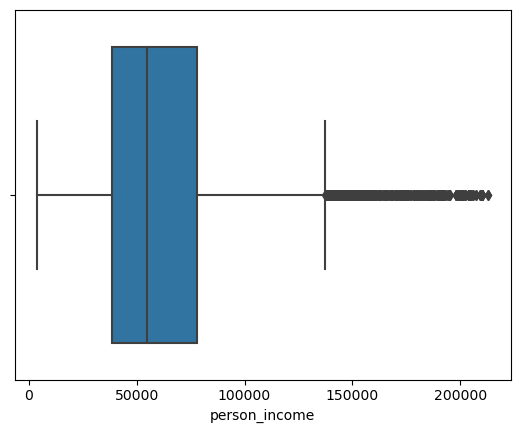

In [29]:
sns.boxplot(x = df.person_income)

In [30]:
df['zscore_len']=stats.zscore(df.person_emp_length )
df=df.loc[df['zscore_len'].abs()< 3]
df.shape

(31095, 15)

In [31]:
df.drop(['zscore_age'],axis= 1, inplace = True)
df.drop(['zscore_income'],axis= 1, inplace = True)
df.drop(['zscore_len'], axis = 1, inplace = True)

In [32]:
df.skew()

person_age                    1.257868
person_income                 1.322086
person_emp_length             0.810489
loan_amnt                     1.175069
loan_int_rate                 0.213183
loan_status                   1.351895
loan_percent_income           1.058168
cb_person_cred_hist_length    1.252448
dtype: float64

In [33]:
df.shape

(31095, 12)

# Machine Learning

In [34]:
#Identify Input(X) and output (y)
y = df['loan_status']
X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [35]:
#Split the data
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state= 100)

In [36]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12415,24,80689,MORTGAGE,1.0,DEBTCONSOLIDATION,C,16000,13.22,0.20,Y,2
24564,28,74600,OWN,12.0,PERSONAL,C,9500,10.78,0.13,N,9
2714,25,50000,RENT,5.0,PERSONAL,A,12000,7.88,0.24,N,2
21128,30,45000,MORTGAGE,11.0,VENTURE,C,10000,13.57,0.22,Y,6
23443,28,32500,RENT,0.0,MEDICAL,A,8250,7.51,0.25,N,10


In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(23321, 11) (23321,)
(7774, 11) (7774,)


In [38]:
#Seperate the Categorial and Numerical Columns:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12415,24,80689,MORTGAGE,1.0,DEBTCONSOLIDATION,C,16000,13.22,0.20,Y,2
24564,28,74600,OWN,12.0,PERSONAL,C,9500,10.78,0.13,N,9
2714,25,50000,RENT,5.0,PERSONAL,A,12000,7.88,0.24,N,2
21128,30,45000,MORTGAGE,11.0,VENTURE,C,10000,13.57,0.22,Y,6
23443,28,32500,RENT,0.0,MEDICAL,A,8250,7.51,0.25,N,10


In [39]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [40]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12415,MORTGAGE,DEBTCONSOLIDATION,C,Y
24564,OWN,PERSONAL,C,N
2714,RENT,PERSONAL,A,N
21128,MORTGAGE,VENTURE,C,Y
23443,RENT,MEDICAL,A,N


In [41]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12415,24,80689,1.0,16000,13.22,0.20,2
24564,28,74600,12.0,9500,10.78,0.13,9
2714,25,50000,5.0,12000,7.88,0.24,2
21128,30,45000,11.0,10000,13.57,0.22,6
23443,28,32500,0.0,8250,7.51,0.25,10


In [42]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12415,24,80689,1.0,16000,13.22,0.20,2
24564,28,74600,12.0,9500,10.78,0.13,9
2714,25,50000,5.0,12000,7.88,0.24,2
21128,30,45000,11.0,10000,13.57,0.22,6
23443,28,32500,0.0,8250,7.51,0.25,10


In [43]:
#Scaling the Numerical Features
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12415,24,80689,1.0,16000,13.22,0.20,2
24564,28,74600,12.0,9500,10.78,0.13,9
2714,25,50000,5.0,12000,7.88,0.24,2
21128,30,45000,11.0,10000,13.57,0.22,6
23443,28,32500,0.0,8250,7.51,0.25,10


In [44]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12415,-0.613138,0.552946,-0.999833,1.067522,0.722957,0.270168,-0.982649
24564,0.167534,0.370570,2.090712,0.010775,-0.071830,-0.385470,0.987609
2714,-0.417970,-0.366241,0.124002,0.417216,-1.016455,0.644818,-0.982649
21128,0.557871,-0.515999,1.809754,0.092064,0.836964,0.457493,0.143213
23443,0.167534,-0.890395,-1.280792,-0.192445,-1.136976,0.738481,1.269075


In [45]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,23321.000000,23321.000000,23321.000000,23321.000000,23321.000000,23321.000000,23321.000000
mean,27.141589,62227.718666,4.558648,9433.721753,11.000519,0.171155,5.491188
std,5.123896,33387.836344,3.559318,6151.084264,3.070069,0.106769,3.552911
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,38400.000000,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.020000,0.150000,4.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.110000,0.230000,8.000000
max,46.000000,213000.000000,16.000000,35000.000000,23.220000,0.770000,17.000000


In [46]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 7
Mean of each column: [2.71415891e+01 6.22277187e+04 4.55864843e+00 9.43372175e+03
 1.10005188e+01 1.71155182e-01 5.49118820e+00]
std of each column: [5.12378597e+00 3.33871205e+04 3.55924216e+00 6.15095238e+03
 3.07000327e+00 1.06766260e-01 3.55283459e+00]


In [47]:
#Applying OneHotEncoding on Categorical Columns
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12415,MORTGAGE,DEBTCONSOLIDATION,C,Y
24564,OWN,PERSONAL,C,N
2714,RENT,PERSONAL,A,N
21128,MORTGAGE,VENTURE,C,Y
23443,RENT,MEDICAL,A,N


In [48]:
X_train_cat['person_home_ownership'].value_counts(normalize = True)

RENT        0.512885
MORTGAGE    0.406072
OWN         0.077741
OTHER       0.003302
Name: person_home_ownership, dtype: float64

In [49]:
X_train_cat['loan_intent'].value_counts(normalize = True)

EDUCATION            0.200849
MEDICAL              0.185455
VENTURE              0.176493
PERSONAL             0.166588
DEBTCONSOLIDATION    0.161400
HOMEIMPROVEMENT      0.109215
Name: loan_intent, dtype: float64

In [50]:
X_train_cat['loan_grade'].value_counts(normalize = True)

A    0.331118
B    0.321599
C    0.199262
D    0.109215
E    0.030145
F    0.006947
G    0.001715
Name: loan_grade, dtype: float64

In [51]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize = True)

N    0.824364
Y    0.175636
Name: cb_person_default_on_file, dtype: float64

In [52]:
#Apply Encoding in Categorical Column
#OneHotEncoding
X_train_cat_ohe_df = X_train_cat.drop('loan_grade', axis = 1 )
X_train_cat_ohe_df

,person_home_ownership,loan_intent,cb_person_default_on_file
12415,MORTGAGE,DEBTCONSOLIDATION,Y
24564,OWN,PERSONAL,N
2714,RENT,PERSONAL,N
21128,MORTGAGE,VENTURE,Y
23443,RENT,MEDICAL,N
...,...,...,...
12168,RENT,VENTURE,N
24799,RENT,HOMEIMPROVEMENT,N
14197,RENT,MEDICAL,Y
23678,RENT,MEDICAL,N


In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_ohe_df), 
                               columns=encoder.get_feature_names_out(X_train_cat_ohe_df.columns), 
                               index = X_train_cat_ohe_df.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
12415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24564,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23443,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
#Label Encoder
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
12415
24564
2714
21128
23443


In [55]:
X_train_cat.loan_grade.unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [56]:
loan_grade_encoder = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_train_cat_le.head()

,loan_grade
12415,5
24564,5
2714,7
21128,5
23443,7


In [57]:
 #Concatinating the Encoded Categorical Features and Rescaled Numerical Features
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
12415,-0.613138,0.552946,-0.999833,1.067522,0.722957,0.270168,-0.982649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
24564,0.167534,0.370570,2.090712,0.010775,-0.071830,-0.385470,0.987609,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
2714,-0.417970,-0.366241,0.124002,0.417216,-1.016455,0.644818,-0.982649,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7
21128,0.557871,-0.515999,1.809754,0.092064,0.836964,0.457493,0.143213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5
23443,0.167534,-0.890395,-1.280792,-0.192445,-1.136976,0.738481,1.269075,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7


In [58]:
#Preparing Test Data
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16294,26,71004,RENT,0.0,DEBTCONSOLIDATION,D,20000,13.36,0.28,N,2
12236,21,32000,RENT,0.0,PERSONAL,B,12000,11.02,0.38,N,4
11918,23,29472,RENT,3.0,DEBTCONSOLIDATION,C,11000,13.49,0.37,N,4
3164,25,36000,RENT,3.0,VENTURE,A,3500,6.62,0.10,N,3
3424,25,36300,MORTGAGE,5.0,VENTURE,A,9000,6.99,0.25,N,2


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 16294 to 31812
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7774 non-null   int64  
 1   person_income               7774 non-null   int64  
 2   person_home_ownership       7774 non-null   object 
 3   person_emp_length           7774 non-null   float64
 4   loan_intent                 7774 non-null   object 
 5   loan_grade                  7774 non-null   object 
 6   loan_amnt                   7774 non-null   int64  
 7   loan_int_rate               7774 non-null   float64
 8   loan_percent_income         7774 non-null   float64
 9   cb_person_default_on_file   7774 non-null   object 
 10  cb_person_cred_hist_length  7774 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 728.8+ KB


In [60]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
16294,RENT,DEBTCONSOLIDATION,D,N
12236,RENT,PERSONAL,B,N
11918,RENT,DEBTCONSOLIDATION,C,N
3164,RENT,VENTURE,A,N
3424,MORTGAGE,VENTURE,A,N


In [61]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
16294,26,71004,0.0,20000,13.36,0.28,2
12236,21,32000,0.0,12000,11.02,0.38,4
11918,23,29472,3.0,11000,13.49,0.37,4
3164,25,36000,3.0,3500,6.62,0.10,3
3424,25,36300,5.0,9000,6.99,0.25,2


In [62]:
# For Numerical

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
16294,-0.222802,0.262864,-1.280792,1.717828,0.768560,1.019468,-0.982649
12236,-1.198643,-0.905371,-1.280792,0.417216,0.006346,1.956094,-0.419718
11918,-0.808306,-0.981088,-0.437916,0.254640,0.810905,1.862431,-0.419718
3164,-0.417970,-0.785564,-0.437916,-0.964683,-1.426878,-0.666458,-0.701183
3424,-0.417970,-0.776578,0.124002,-0.070513,-1.306357,0.738481,-0.982649


In [63]:
#For categorical
#OneHotEncoding
X_test_cat_ohe_df = X_test_cat.drop('loan_grade', axis = 1 )
X_test_cat_ohe_df


X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_ohe_df), 
                               columns=encoder.get_feature_names_out(X_test_cat_ohe_df.columns), 
                               index = X_test_cat_ohe_df.index)

X_test_cat_ohe.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
16294,RENT,DEBTCONSOLIDATION,N
12236,RENT,PERSONAL,N
11918,RENT,DEBTCONSOLIDATION,N
3164,RENT,VENTURE,N
3424,MORTGAGE,VENTURE,N
...,...,...,...
23666,RENT,PERSONAL,Y
30617,RENT,HOMEIMPROVEMENT,N
23459,RENT,DEBTCONSOLIDATION,N
31878,RENT,DEBTCONSOLIDATION,Y


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
16294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12236,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11918,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3164,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
#Label Encoding

X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
16294
12236
11918
3164
3424


In [65]:
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_test_cat_le.head()

,loan_grade
16294,4
12236,6
11918,5
3164,7
3424,7


In [66]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
16294,-0.222802,0.262864,-1.280792,1.717828,0.768560,1.019468,-0.982649,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12236,-1.198643,-0.905371,-1.280792,0.417216,0.006346,1.956094,-0.419718,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
11918,-0.808306,-0.981088,-0.437916,0.254640,0.810905,1.862431,-0.419718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3164,-0.417970,-0.785564,-0.437916,-0.964683,-1.426878,-0.666458,-0.701183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
3424,-0.417970,-0.776578,0.124002,-0.070513,-1.306357,0.738481,-0.982649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7


# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

## Prediction

In [68]:
# Prediction

y_test_pred = classifier.predict(X_test_transformed)


## Evaluation

In [69]:
# calculate the accuracy of class predictions

from sklearn import metrics
# from sklearn.metrics import accuracy_score

Accuracy_LR = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_LR )

Accuracy:  0.8488551582197067


In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16294,1,1
12236,1,1
11918,1,1
3164,0,0
3424,0,0


## Training - Support Vector Classifier

In [71]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_SVC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_SVC )

SVC()

Accuracy:  0.890275276562902


## Training - KNN Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_KNN = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_KNN )

KNeighborsClassifier()

Accuracy:  0.8841008489837922


In [73]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8841008489837922

## Training - DT Classifie

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_DTC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_DTC )

DecisionTreeClassifier()

Accuracy:  0.8879598662207357


In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()


,Actual,Predicted
16294,1,1
12236,1,1
11918,1,1
3164,0,0
3424,0,0


## Training - Ramdom Forest Classifier


In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_RFC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_RFC )

RandomForestClassifier()

Accuracy:  0.9338821713403653


In [77]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16294,1,1
12236,1,1
11918,1,1
3164,0,0
3424,0,0


## Boosting: Gradient Boosted Decision Tree

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_GBDT = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_GBDT )

GradientBoostingClassifier()

Accuracy:  0.9242346282480062


In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16294,1,1
12236,1,1
11918,1,1
3164,0,0
3424,0,0


## Boosting: ADA Boosting

In [80]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_ADAB = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_ADAB )

AdaBoostClassifier()

Accuracy:  0.8879598662207357


In [81]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16294,1,1
12236,1,1
11918,1,1
3164,0,0
3424,0,0


In [82]:
df_data = [['Logistic Regression', Accuracy_LR],
                   ['Decision Tree Classifier', Accuracy_DTC],
                   ['Support Vector Classifier', Accuracy_SVC],
                   ['KNearestNeighbor Classifier', Accuracy_KNN],
                   ['Random Forest Classifier ',Accuracy_RFC],
                ['Gradient Boosting Decision Tree Clasifier', Accuracy_GBDT],
          ['Adaptive Boosting Clasifier',Accuracy_ADAB]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy_score'])

In [83]:
data

,Algorithm,Accuracy_score
0,Logistic Regression,0.848855
1,Decision Tree Classifier,0.887960
2,Support Vector Classifier,0.890275
3,KNearestNeighbor Classifier,0.884101
4,Random Forest Classifier,0.933882
5,Gradient Boosting Decision Tree Clasifier,0.924235
6,Adaptive Boosting Clasifier,0.887960


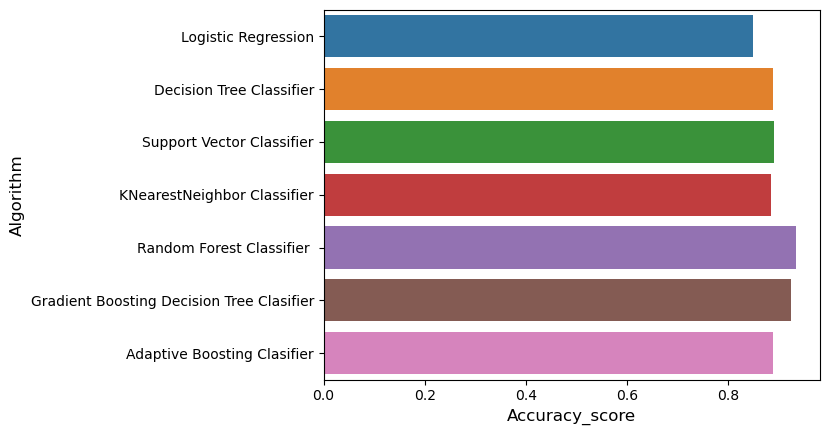

In [88]:
plt.xlabel('Accuracy_score',fontsize = 12, color = 'black')
plt.ylabel('Algorithm',fontsize = 12, color = 'black')
sns.barplot(y=data.Algorithm, x = data.Accuracy_score);

# Conclusion
- By comparing all algorithm the Random Forest Classifier algorithm giving high or max accuracy score .
- **Random Forest Classifier** algorithm is the best model for prediction.